## Data Cleaning and Analysis for Employee Exit Surveys
We are carrying out a data analysis on the results of two surveys from the Department of Education, Training and Employment(DETE) and the Technical and Further Education(TAFE)institute in Australia to answer two important queations:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The data sets came whith no dictionary so we shall be using my general knowledge to define columns

### Introduction
First we shall read in the data set and do some kind of exploratory analysis

In [1]:
#Importing libraries needed
import pandas as pd
import numpy as np

In [2]:
#Read in data
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
#Data Exploration
#understand structure of data 
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
#Data Exploration
#View first few entries in data set
print(dete_survey.head(6))

#Check for missing data
dete_survey.isnull().sum()

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   
5   6         Resignation-Other reasons    05/2012            1994   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   
5            1997                              Guidance Officer   

  Classification              Region   

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
#Data Exploration
#understand structure of data 
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

## Check for Missing Values and Columns Selection for analysis

In [6]:
#Data Exploration
#View first few entries in data set
print(tafe_survey.head(6))

#Check for missing data
tafe_survey.isnull().sum()

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   
5       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector  

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Initial analysis after exploratoty data analysis:
From the dete_survey data set,Theer are a couple of coulmns such as 
Aboriginal                             806
Torres Strait                          819
South Sea                              815
Disability                             799
NESB                                   790
Classification                         367
Business Unit                          696
with very high amount of missing data , we shall need to take a closer look to understand the missingness.
We also have Dete start date and Role start date which contain missing data as "Not Stated" insdead of the traditional NaN. We shall have to take a closer look at this too.

From the tafe_survey data set,one specific column :
Main Factor. Which of these was the main factor for leaving?      589    
has a very amount of mising data; also, afew columns have about the same number of missing data , we need to take a closer look at these values:
Contributing Factors. Career Move - Public Sector                  265                                                                                              
Contributing Factors. Career Move - Private Sector                 265                            
Contributing Factors. Career Move - Self-employment                265                          
Contributing Factors. Ill Health                                   265                         
Contributing Factors. Maternity/Family                             265                                                                                           
Contributing Factors. Dissatisfaction                              265                                                                                          
Contributing Factors. Job Dissatisfaction                          265                                                                                              
Contributing Factors. Interpersonal Conflict                       265                                                                                              
Contributing Factors. Study                                        265                                                                                            
Contributing Factors. Travel                                       265                                                                                            
Contributing Factors. NONE                                         265                                                                                              

In [7]:
#Lets fix the problem of nt stated as Nan value

dete_survey = pd.read_csv("dete_survey.csv",na_values = "Not Stated")


In [8]:
#Lets drop some columns we dont need
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Rename Columns 
Here, we name columns in different tables to same names so we can easily merge tables together.

In [9]:
#Renaming columns so that we can easily combine tables
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [10]:
#Lets rename some of the columns in tafe_survey_updated
mapping = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender'
                          ,'CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
                          'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
                          ,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping,axis=1)

In [11]:
#Quick glance to view changes
print(dete_survey_updated.head(5))
print()
print(tafe_survey_updated.head(5))

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

## Filter the Data

We want to analyze the data set for only those who resigned. For that reason, we shall select seperationtype only resignation.

In [12]:
#Lets check some of the unique values of seperation type 
#Quick glance to view changes
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [15]:
#Isolating the resignation reason in separtion type to answer our problem statement
#Doing this for both dataframes
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"]
tafe_resignations =  tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"]


## Verify the Data
Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

Since the cease_date is the last year of the person's employment and the dete_start_date is the first year of employment, it wouldn't make sense to have years after the current date.

As we continue our analysis, we shall pay close attention to the date values to make sure there are no inconsistencies or extrem dates.

In [16]:
#Check unique values in cease_date column
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [17]:
#Lets convert all dates to the same format
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
#Convert values to float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
dete_resignations["cease_date"].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [20]:
#Checking for unique values in date_start_date column
dete_resignations["dete_start_date"].value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [21]:
#hecking for unique values in cease_date coulmn form tafe_resignation
tafe_resignations["cease_date"].value_counts().sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Below are our findings:

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

## Create a New Column
Our objective is to know the length of time each employee spent at the work place in both dataframes.
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.
To get the years of service, we subtract dete_start_date from the cease_date and create a new column named institute_service.

In [22]:
#I will create an institute_service column in dete_resignations 
#to match the coulmn in tafe_resignations

dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
# Quick check of the result
dete_resignations['institute_service'].head(7)

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
12    14.0
14     5.0
Name: institute_service, dtype: float64


## Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dafe_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied in some way
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [24]:
#Lets view unique values in the above columns
print(tafe_survey_updated["Contributing Factors. Job Dissatisfaction"].value_counts())
print()
tafe_survey_updated['Contributing Factors. Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64



-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
#Function to update values in the above two columns so we have true or false
def update_vals(x):
        if pd.isnull(x):
            return np.nan
        elif x == "-":
            return False
        else:
            return True

In [26]:
#Update values in contribution factors columns to a new column dissatisfied

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

#Check for unique values after the update
tafe_resignations['dissatisfied'].value_counts(dropna = False)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    162
True     149
Name: dissatisfied, dtype: int64

From the above, now we have a clean column consisting of True , False and No value entries for the dissatisfied coulmn which will be needed for further analysis

## Combine the Two Dataframes

In [28]:
#Here, we shall add one column in ech data frame to identify the data set
#In dete_resignations_up I will add a column with DETE value
#In the tafe_resignations_up,we shall add a column with the TAFE value

dete_resignations_up["institute"] = "DETE"

tafe_resignations_up["institute"] = "TAFE"


In [29]:
#Combine the two dataframes above 
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index = True)

In [30]:
#View null values in new data set
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [31]:
#Dropping columns with over 500 null values
combined_updated = combined.dropna(axis = 1,thresh = 500)

In [32]:
#View coulmns in new data frame
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

## Clean the Service Column

We shall clean the service column to the follwoing format :

New: Less than 3 years in the workplace
Experienced: 3-6 years in the workplace
Established: 7-10 years in the workplace
Veteran: 11 or more years in the workplace



In [33]:
#Extracting all digits in the columns
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(r'(\d+)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
#Function that maps each value to one career stage as explained before

def map_func(x):
    if x >= 11:
        return "Veteran"
    elif x >= 7:
        return "Established"
    elif x >= 3:
        return "Experienced"
    elif pd.isnull(x):
        return np.nan
    else:
        return "New"


In [36]:
#Apply function to column to transdorm it 
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_func)

#View values
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform some Analysis and Deal with Missing Data

In [37]:
#Dealing with missing data
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
#Substitute value for Nan with Most frequent value False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
pct_plot = pd.pivot_table(combined_updated,index = 'service_cat',values='dissatisfied')
print(pct_plot)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


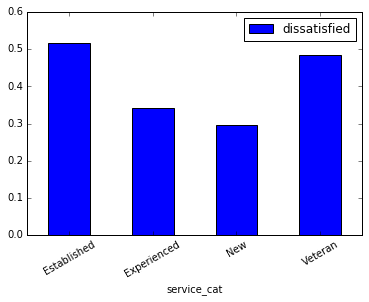

In [41]:
# Plot the results
%matplotlib inline
pct_plot.plot(kind='bar', rot=30)

Based on my results, I can observe that employees who are in the category of veterans and established tend to be more dissatified with the job situation than employees who are new and experienced.